### 2) Generujte 105 hodnot náhodné veličiny s následujícími parametry : 

p(x) = 5/12 * (1+ (x-1)^4), x <0,2>    Pomoci

a) metody výběru (Neumanovy)

b) metody superpozice
p1 = 1/2 c1 =5/6, p2 = 5/2 * (x-1)^4  c2 = 1/6

V obou případech sestrojte grafy relativních četností a porovnejte je.

• Jaký vztah mají zmíněné grafy ke grafu p(x) ?

• Porovnejte časové náročnosti generování náhodné veličiny vzhledem ke zvolenému algoritmu.

Transformace nahodnych velicin v metode MC je postup, ktery umoznuje zmenit jednoduche nahodne cislo (gen pocitacem) na slozitejsi velicinu, ktera je pouzivana v modelu.

1) Spojita nahodna velecina γ  rozdelenou na intervalu <0,1>

2) Transformace na slozitejsi nahodnou velicinu ξ. Pomoci metody transformace

3) Priklady transformace a) metody výběru (Neumanovy) b) metody superpozice

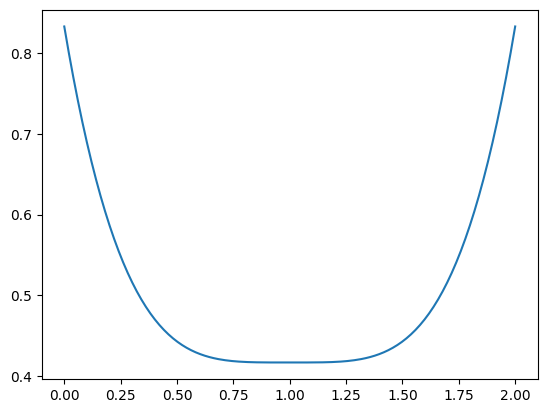

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f_ce(x):
    fce = 5/12 * (1+ (x-1)**4 )
    return fce

x = np.linspace(0,2,200)
y = []
for i in range(len(x)):
    y_i = f_ce(x[i])
    y.append(y_i)
    
plt.plot(x, y)

## A) Metoda vyberu

p(x): Toto je hustota pravděpodobnosti náhodné veličiny, kterou chceme generovat. Pro x v intervalu <0,2>

1) Zvolit konst M aby p(x) <= M, x<a,b>

2) Generovat nah veleciny γ, γ1 a γ2 a vytvoříme čísla η1 = a + γ1(b − a), η2 = M γ2.

3) Bude-li bod P o souřadnicích (η1, η2) ležet pod křivkou y = p(x),
tj. bude-li η2 < p(η1), zvolíme ξ = η1. Nebude-li podmínka splněna,
nagenerujeme novou dvojici γ1 a γ2 a postup opakujeme.

Účinnost metody závisí na hodnotě M, kterou je nutno zvolit co
nejmenší, tj. co nejblíže hodnotě M = sup p(x) pro a ≤ x ≤ b.


M - sup, n1 - x, n2 -y


In [2]:
def p(x):
    fce = 5/12 * (1+ (x-1)**4 )
    return fce

x = np.linspace(0,2,10000)
y = []
y_max = 0
for i in range(len(x)):
    y_i = p(x[i])
    if y_i > y_max:
        y_max = y_i
    y.append(y_i)
        
print(y_max ) # nase M

0.8333333333333334


In [14]:
import random
import time
M = 0.8333
a = 0
b = 2
pocet_generovani = int(1e4)

def gen_nah_vel(a,b, M):
    y1 = random.random()
    y2 = random.random()
    
    n1 = a + y1 * (b-a)
    n2 = M * y2
    return n1, n2

start = time.time()
e = []
while len(e)< pocet_generovani:
    n1, n2 = gen_nah_vel(a, b, M)
    p_n1 = p(n1)
    if n2 < p_n1:
        ei= n1
        e.append(ei)
end = time.time() - start

print(end)

0.02566218376159668


In [21]:
type(e)

list

Graf relativni cetnosti -  jak často se objevuje určitá hodnota nebo výsledek v rámci datového souboru. Je to poměr počtu výskytů dané hodnoty k celkovému počtu všech výskytů. (%)

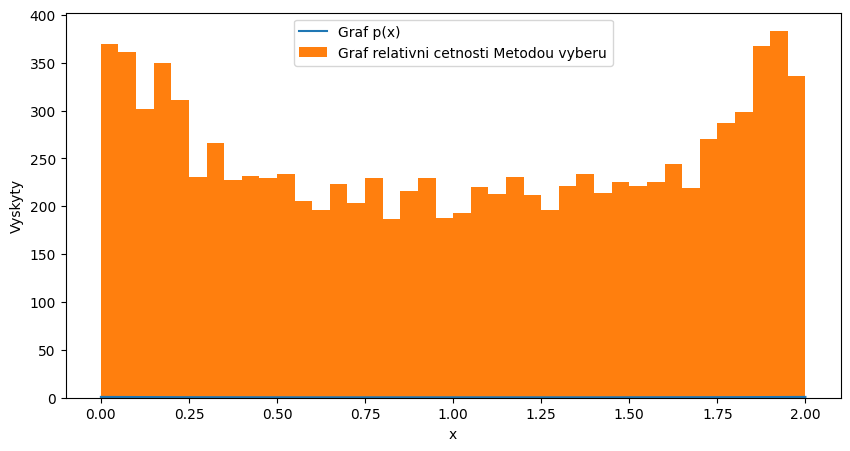

In [4]:
plt.figure(figsize=(10,5))
plt.plot(x,y, label= "Graf p(x)")
plt.hist(e, bins= 40, density=True, label= "Graf relativni cetnosti Metodou vyberu")
plt.xlabel("x")
plt.ylabel("Vyskyty")
plt.legend()
plt.show();

In [11]:
e

<function __main__.e()>

Vztah mezi grafem relativních četností a grafem funkce p(x) - Graf relativních četností by měl odrážet tvar funkce p(x)


## B) metody superpozice

Tato metoda není omezena pouze na spojité náhodné veličiny, i když
ji budeme využívat téměř výhradně pro ně. Budeme hledat náhodnou
veličinu ξ s distribuční funkcí

F(x) = Σ ci * Fi(x), Fi(x) - distribucni f-ce c1 + ... + cn = 1, ci > 0

Diskrétní náhodna veličina η s rozdělením

η = (1  2  ...  m; c1  c2  ... cm)

Hledanou veličinu ξ s distribuční funkcí F(x) najdeme tímto způsobem:

– nagenerujeme dvě nezávislé hodnoty γ1 a γ2 veličiny γ

– rozehrajeme číslem γ1 hodnotu η = k

– z rovnice Fk(ξ) = γ2 určíme veličinu ξ.


#### p1 = 1/2   c1 =5/6,   p2 = 5/2 * (x-1)^4   c2 = 1/6

p(x) = 1/2 * 5/6 + 1/6 * 5/2 * (x-1)^4

p(x) = p1 * c1 + p2  *c2

V nase uloze:

1) p(x) je pozdelena na 2 casti (p1, p2) s prirazenemi vahami (c1, c2). Splnuji podminku c1+ c2 = 1 a c1,c2 >0

2) p1 - konstantni distribuce, p2 - f-ce

3) -Pro generovani hodnot nahodne veleciny ξ s distribucni f-ce F(x) vytvorime diskretni nahodnou velecinu η s rozdelenim zalozenym na vahach c1 c2.

- Generovani dvou nezavislych hodnot γ1 a γ2, kde γ1 urcuje ktera cast distribuce (p1 nebo p2) bude pouzita, a γ2 se pouziva k urceni hodnoty teto distribuce.

inv f-ce p1: 1/2 x = F(x), x = F(x) * 2, F(v) = 2 * v

p2: (x-1)^5 /2 = F(x), F(v) = 2^1/5 * v^1/5 + 1

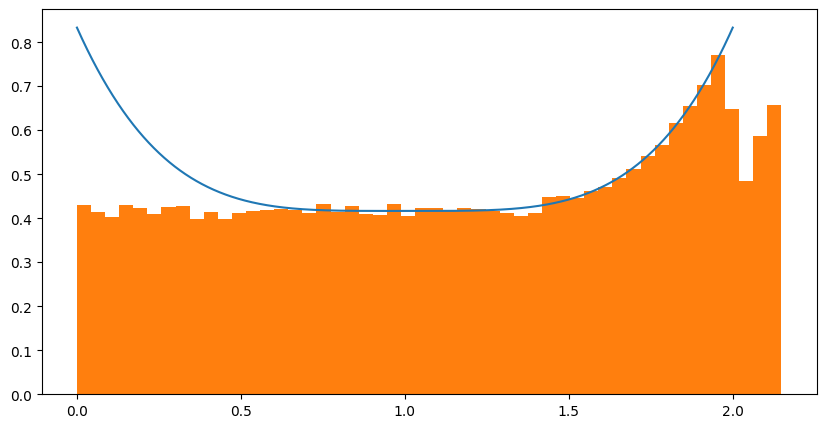

In [5]:
import random
def p1(x): # inverzni f-ce pro urceni hodnoty nahodne veleciny ξ z nahodne denerovaneho cisla y2
    return 2 * x

def p2(x):
    return 2**(1/5) * x**(1/5) + 1 #* x**(1/5)

c1 = 5/6 
c2 = 1/6

def e(a,b):
    y1 = random.random() # urci jeli c1 c2
    y2 = random.random() # urcime velecinu pomoci y2
    
    if y1 < c1:
        return p1(y2)
    else:
        return p2(y2)



generovane_veleciny = []
for i in range(100000):
    generovane_veleciny.append(e(a,b))

plt.figure(figsize=(10,5))
plt.plot(x,y, label= "Graf p(x)")
plt.hist(generovane_veleciny, bins= 50, density= True)
plt.show();

c:\Users\Home\Desktop\vyučovaní\Programovani\Montekarlo\.venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Home\Desktop\vyučovaní\Programovani\Montekarlo\.venv\Lib\site-packages\numpy\lib\histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\Home\Desktop\vyučovaní\Programovani\Montekarlo\.venv\Lib\site-packages\numpy\lib\histograms.py:884: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
c:\Users\Home\Desktop\vyučovaní\Programovani\Montekarlo\.venv\Lib\site-packages\matplotlib\axes\_axes.py:6862: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


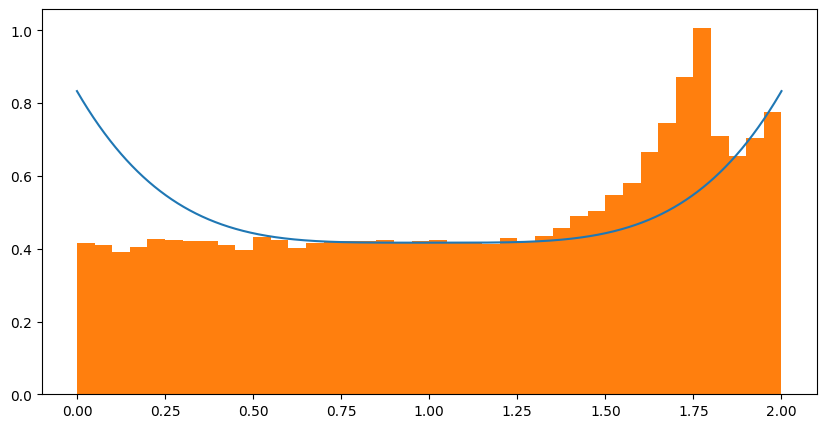

In [22]:
import random
def p1(x): # inverzni f-ce pro urceni hodnoty nahodne veleciny ξ z nahodne denerovaneho cisla y2
    return 2 * x

def p2(x):
    return (2*x -1)**(1/5) + 1 

c1 = 5/6 
c2 = 1/6

def e():
    y1 = random.random() # urci jeli c1 c2
    y2 = random.random() # urcime velecinu pomoci y2
    
    if y1 < c2:  #  Prvních 5/6 osy odpovídá distribuci p1.
        return p2(y2)
    else:        #Zbývající 1/6 osy pak odpovídá distribuci p2.
        return p1(y2)



generovane_veleciny = []
for i in range(100000):
    generovane_veleciny.append(e())

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.hist(generovane_veleciny, bins= 40, density= True)
plt.show();

??? Casove narocnosti nema smysl